# 4. Projekt - Przewidywanie jakości wina na podstawie jego właściwości

Wczytanie bibliotek

In [1006]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

Wczytanie danych

In [1007]:
data = pd.read_csv("winequality-red.csv", sep=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Wymiary danych

In [1008]:
data.shape

(1599, 12)

Wykres korelacji

<Axes: >

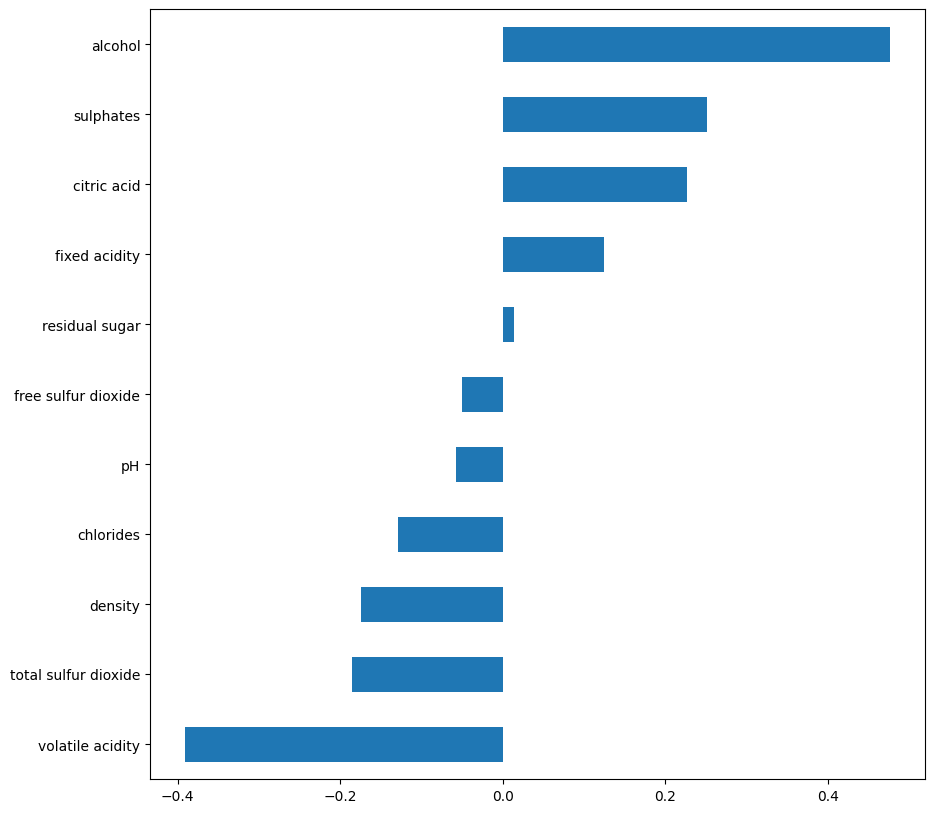

In [1009]:
corr_value = data.corr()['quality']
corr_value = corr_value.drop(['quality'])
corr_value = corr_value.sort_values()
corr_value.plot.barh(figsize=(10,10))

Zliczenie unikalnych ocen win

In [1010]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Podział ocen na kategorie

In [1011]:
data = data.replace({'quality' : {
                                    8 : 'Good',
                                    7 : 'Good',
                                    6 : 'Average',
                                    5 : 'Average',
                                    4 : 'Bad',
                                    3 : 'Bad',
        }})

Ponowne zliczenie unikalnych ocen win

In [1012]:
data['quality'].value_counts()

Average    1319
Good        217
Bad          63
Name: quality, dtype: int64

Wyznaczenie zbioru X

In [1013]:
X = data.drop('quality', axis = 1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


Wyznaczenie zbioru y

In [1014]:
y = data[['quality']]
y.head()

,quality
0,Average
1,Average
2,Average
3,Average
4,Average


Podział na zbiory treningowe i testowe

In [1015]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Normalizacja MinMax

In [1016]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model regresji logistycznej

In [1017]:
LRmodel = LogisticRegression(multi_class='ovr',solver='liblinear')
LRmodel.fit(X_train, y_train)
LRpred = LRmodel.predict(X_test)
LRcr = classification_report(y_test, LRpred,output_dict=True)
LRaccuracy = accuracy_score(y_test, LRpred)

c:\Users\milos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\milos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\milos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\U

Model k najbliższych sąsiadów

In [1018]:
KNNmodel = KNeighborsClassifier(weights='distance')
KNNmodel.fit(X_train, y_train)
KNNpred = KNNmodel.predict(X_test)
KNNcr = classification_report(y_test,KNNpred,output_dict=True)
KNNaccuracy = accuracy_score(y_test, KNNpred)

c:\Users\milos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\milos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\milos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Us

Model lasu losowego

In [1019]:
RFmodel = RandomForestClassifier()
RFmodel.fit(X_train, y_train)
RFpred = RFmodel.predict(X_test)
RFcr = classification_report(y_test,RFpred,output_dict=True)
RFaccuracy = accuracy_score(y_test, RFpred)

c:\Users\milos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\milos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\milos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:

Tworzenie zbioru z nadpróbkowaniem

In [1020]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model regresji logistycznej z nadpróbkowaniem

In [1021]:
LRmodel = LogisticRegression(multi_class='ovr',solver='liblinear')
LRmodel.fit(X_train, y_train)
LRpred = LRmodel.predict(X_test)
LRcr_OVS = classification_report(y_test, LRpred,output_dict=True)
LRaccuracy_OVS = accuracy_score(y_test, LRpred)

c:\Users\milos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model k najbliższych sąsiadów z nadpróbkowaniem

In [1022]:
KNNmodel = KNeighborsClassifier(weights='distance')
KNNmodel.fit(X_train, y_train)
KNNpred = KNNmodel.predict(X_test)
KNNcr_OVS = classification_report(y_test,KNNpred,output_dict=True)
KNNaccuracy_OVS = accuracy_score(y_test, KNNpred)

c:\Users\milos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model lasu losowego z nadpróbkowaniem

In [1023]:
RFmodel = RandomForestClassifier()
RFmodel.fit(X_train, y_train)
RFpred = RFmodel.predict(X_test)
RFcr_OVS = classification_report(y_test,RFpred,output_dict=True)
RFaccuracy_OVS = accuracy_score(y_test, RFpred)

c:\Users\milos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Lista dokładności

In [1024]:
all_accuracy = [LRaccuracy_OVS, KNNaccuracy_OVS, RFaccuracy_OVS, LRaccuracy, KNNaccuracy, RFaccuracy]
all_accuracy = [round(x, 2) for x in all_accuracy]

Porównanie dokładności różnych modeli

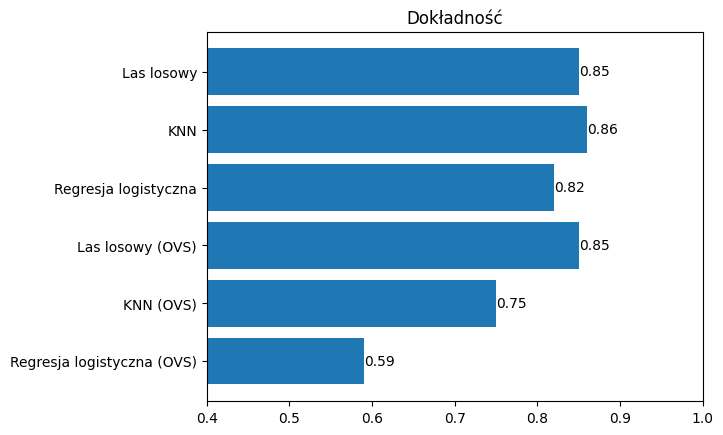

In [1025]:
plt.barh(['Regresja logistyczna (OVS)', 'KNN (OVS)', 'Las losowy (OVS)', 'Regresja logistyczna', 'KNN', 'Las losowy'], all_accuracy)
plt.title('Dokładność')
ax = plt.gca()
ax.set_xlim([0.4, 1])
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

Tworzenie zbiorów precyzji

In [1026]:
bad_precision = [RFcr['Bad']['precision'], KNNcr['Bad']['precision'], LRcr['Bad']['precision'], RFcr_OVS['Bad']['precision'], KNNcr_OVS['Bad']['precision'], LRcr_OVS['Bad']['precision']]
bad_precision = [round(x, 2) for x in bad_precision]
average_precision = [RFcr['Average']['precision'], KNNcr['Average']['precision'], LRcr['Average']['precision'], RFcr_OVS['Average']['precision'], KNNcr_OVS['Average']['precision'], LRcr_OVS['Average']['precision']]
average_precision = [round(x, 2) for x in average_precision]
good_precision = [RFcr['Good']['precision'], KNNcr['Good']['precision'], LRcr['Good']['precision'], RFcr_OVS['Good']['precision'], KNNcr_OVS['Good']['precision'], LRcr_OVS['Good']['precision']]
good_precision = [round(x, 2) for x in good_precision]

Porównanie precyzji różnych modeli

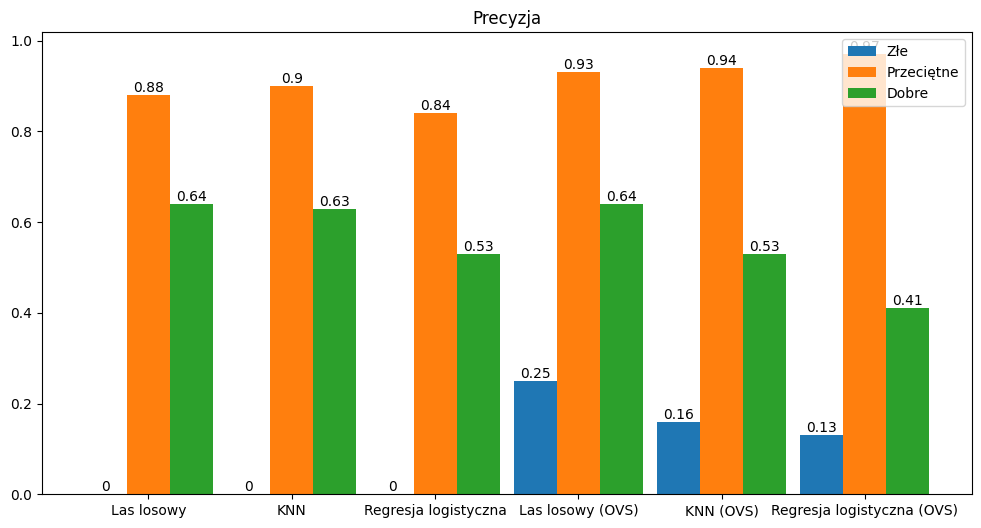

In [1027]:
plt.figure(figsize=(12,6))
width = 0.3
ind = np.arange(6)
plt.bar(ind, bad_precision , width, label='Złe')
plt.bar(ind + width, average_precision, width, label='Przeciętne')
plt.bar(ind + width*2, good_precision, width, label='Dobre')
plt.title('Precyzja')
plt.xticks(ind + width, ('Las losowy', 'KNN', 'Regresja logistyczna', 'Las losowy (OVS)', 'KNN (OVS)', 'Regresja logistyczna (OVS)'))
plt.legend(loc='best')
ax = plt.gca()
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
ax.bar_label(ax.containers[2], label_type='edge')
plt.show()

Tworzenie zbiorów czułości

In [1028]:
bad_recall = [RFcr['Bad']['recall'], KNNcr['Bad']['recall'], LRcr['Bad']['recall'], RFcr_OVS['Bad']['recall'], KNNcr_OVS['Bad']['recall'], LRcr_OVS['Bad']['recall']]
bad_recall = [round(x, 2) for x in bad_recall]
average_recall = [RFcr['Average']['recall'], KNNcr['Average']['recall'], LRcr['Average']['recall'], RFcr_OVS['Average']['recall'], KNNcr_OVS['Average']['recall'], LRcr_OVS['Average']['recall']]
average_recall = [round(x, 2) for x in average_recall]
good_recall = [RFcr['Good']['recall'], KNNcr['Good']['recall'], LRcr['Good']['recall'], RFcr_OVS['Good']['recall'], KNNcr_OVS['Good']['recall'], LRcr_OVS['Good']['recall']]
good_recall = [round(x, 2) for x in good_recall]

Porównanie czułości różnych modeli

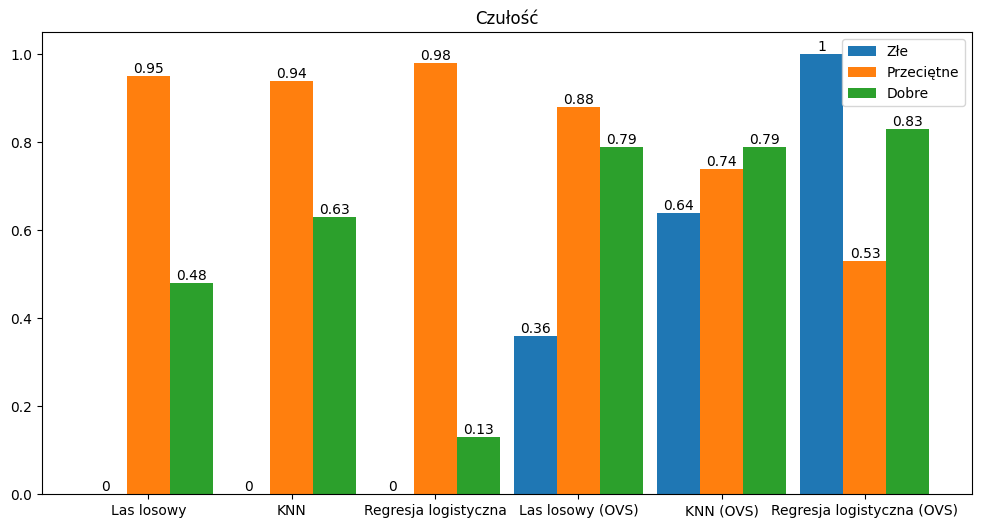

In [1029]:
plt.figure(figsize=(12,6))
width = 0.3
ind = np.arange(6)
plt.bar(ind, bad_recall , width, label='Złe')
plt.bar(ind + width, average_recall, width, label='Przeciętne')
plt.bar(ind + width*2, good_recall, width, label='Dobre')
plt.title('Czułość')
plt.xticks(ind + width, ('Las losowy', 'KNN', 'Regresja logistyczna', 'Las losowy (OVS)', 'KNN (OVS)', 'Regresja logistyczna (OVS)'))
plt.legend(loc='best')
ax = plt.gca()
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
ax.bar_label(ax.containers[2], label_type='edge')
plt.show()